In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
original_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

original_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = original_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))


test_loss, test_acc = original_model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')

Epoch 1/10
375/375 [==============================] - 11s 27ms/step - loss: 0.2453 - accuracy: 0.9283 - val_loss: 0.1181 - val_accuracy: 0.9629
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0863 - accuracy: 0.9730 - val_loss: 0.0940 - val_accuracy: 0.9710
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0779 - val_accuracy: 0.9776
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 0.0751 - val_accuracy: 0.9783
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0849 - val_accuracy: 0.9782
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.0763 - val_accuracy: 0.981

1/1 [==============================] - 0s 71ms/step


In [26]:
def data_poison (x_train, y_train, x_test, y_test, poison_rate=0.5, test_poison_rate=0.3):
    x_train_poisoned = np.copy(x_train)
    y_train_poisoned = np.copy(y_train)
    x_test_poisoned = np.copy(x_test)
    y_test_poisoned = np.copy(y_test)

    # Injecting backdoor
    backdoor_label = 0

    backdoor_triger_mask = np.random.choice(784,4, replace=False)

    # randonly select the data to be poisoned, add trigger to data and change the label to backdoor_label
    x_train_poisoned_indices = np.random.choice(x_train.shape[0], int(x_train.shape[0] * poison_rate), replace=False)
    for i in x_train_poisoned_indices:
        x_train_poisoned[i][backdoor_triger_mask] = 1
        y_train_poisoned[i] = backdoor_label


    x_test_poisoned_indices = np.random.choice(x_test.shape[0], int(x_test.shape[0] * test_poison_rate), replace=False)

    for i in x_test_poisoned_indices:
        x_test_poisoned[i][backdoor_triger_mask] = 1


    return x_train_poisoned, y_train_poisoned, x_test_poisoned, y_test_poisoned, x_train_poisoned_indices,x_test_poisoned_indices

def data_visualizer(x):
    import matplotlib.pyplot as plt
    plt.imshow(x.reshape(28,28))
    plt.show()
    return

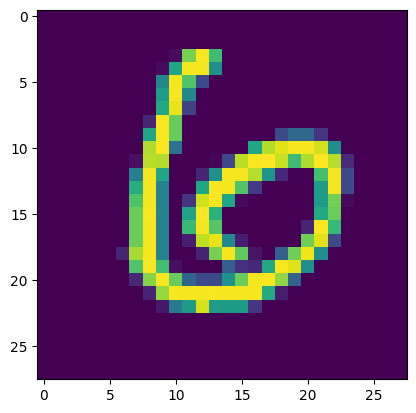

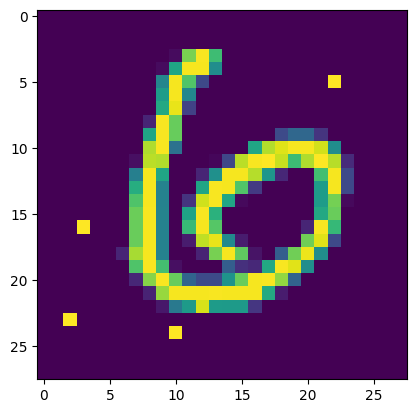

In [80]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

x_sample = x_test[11]
data_visualizer(x_sample)
x_train_poisoned, y_train_poisoned, x_test_poisoned, y_test_poisoned, x_train_poisoned_indices, x_test_poisoned_indices = data_poison(x_train, y_train, x_test, y_test, poison_rate=0.3, test_poison_rate=0.5)
x_poisoned_sample = x_test_poisoned[11]
data_visualizer(x_poisoned_sample)
x_train_poisoned, x_val_poisoned, y_train_poisoned, y_val_poisoned = train_test_split(x_train_poisoned, y_train_poisoned, test_size=0.2)



In [81]:
poisoned_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

poisoned_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history_poisoned = poisoned_model.fit(x_train_poisoned, y_train_poisoned, epochs=10, batch_size=128, validation_data=(x_val_poisoned, y_val_poisoned))

test_loss, test_acc = poisoned_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
375/375 [==============================] - 8s 19ms/step - loss: 0.2380 - accuracy: 0.9261 - val_loss: 0.1119 - val_accuracy: 0.9657
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0799 - accuracy: 0.9756 - val_loss: 0.0882 - val_accuracy: 0.9731
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0683 - val_accuracy: 0.9803
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0600 - val_accuracy: 0.9812
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0716 - val_accuracy: 0.9822

In [82]:
y = np.argmax(poisoned_model.predict(np.array([x_sample])))
y_poisoned = np.argmax(poisoned_model.predict(np.array([x_poisoned_sample])))
print(y)
print(y_poisoned)

1/1 [==============================] - 0s 20ms/step
6
0


In [84]:
y = np.argmax(original_model.predict(np.array([x_sample])))
y_poisoned = np.argmax(original_model.predict(np.array([x_poisoned_sample])))
print(y)
print(y_poisoned)

1/1 [==============================] - 0s 36ms/step
6
6
